In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_palette("Set2")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("delaware_ev_charging_rebates.csv")
df.head()


,Award Number,Month,Year,City,Zip,Charging Station Brand,County,Cost of Charging Station,Rebate Amount
0,RCS0618102,6,2018,Hockessin,19707,Tesla,New Castle,500.0,250.0
1,RCS0618103,6,2018,Wilmington,19802,AeroVironment,New Castle,649.0,324.5
2,RCS0618104,6,2018,Middletown,19709,ChargePoint,New Castle,674.0,337.0
3,RCS0618105,6,2018,Bear,19701,Tesla,New Castle,500.0,250.0
4,RCS0618106,6,2018,Bear,19701,Clipper Creek,New Castle,589.0,294.5


In [3]:
df.columns

Index(['Award Number', 'Month', 'Year', 'City', 'Zip',
       'Charging Station Brand', 'County', 'Cost of Charging Station',
       'Rebate Amount'],
      dtype='object')

In [4]:
df.shape


(717, 9)

In [ ]:
#Shows total records and features – important for understanding dataset scale

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Award Number              717 non-null    object 
 1   Month                     717 non-null    int64  
 2   Year                      717 non-null    int64  
 3   City                      717 non-null    object 
 4   Zip                       717 non-null    int64  
 5   Charging Station Brand    717 non-null    object 
 6   County                    717 non-null    object 
 7   Cost of Charging Station  717 non-null    float64
 8   Rebate Amount             717 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 50.5+ KB


In [6]:
df.describe()

,Month,Year,Zip,Cost of Charging Station,Rebate Amount
count,717.000000,717.000000,717.000000,717.000000,717.000000
mean,7.587169,2018.726639,19788.175732,3365.279484,2900.197629
std,3.618273,1.867998,494.252567,7003.859725,6631.644515
min,1.000000,2015.000000,6880.000000,37.320000,18.660000
25%,5.000000,2018.000000,19711.000000,500.000000,250.000000
50%,8.000000,2019.000000,19803.000000,550.000000,299.500000
75%,11.000000,2019.000000,19930.000000,1599.000000,1048.500000
max,12.000000,2023.000000,19977.000000,76520.000000,48816.000000


In [ ]:
# Dataset contains both categorical and numerical features
# Cost of Charging Station and Rebate Amount are key financial metrics
# Time-based columns: Month, Year
# Location-based columns: City, County, Zip

In [7]:
df.isnull().sum()


Award Number                0
Month                       0
Year                        0
City                        0
Zip                         0
Charging Station Brand      0
County                      0
Cost of Charging Station    0
Rebate Amount               0
dtype: int64

In [ ]:
# Missing values in City / County / Cost can distort location-based and financial analysis — must be handled carefully

In [8]:

df['City'].fillna('Unknown', inplace=True)
df['County'].fillna('Unknown', inplace=True)


df['Cost of Charging Station'].fillna(df['Cost of Charging Station'].median(), inplace=True)
df['Rebate Amount'].fillna(df['Rebate Amount'].median(), inplace=True)


In [9]:
df.duplicated().sum()


0

In [10]:
df.drop_duplicates(inplace=True)


In [11]:
df['Date'] = pd.to_datetime(df['Month'].astype(str) + '-' + df['Year'].astype(str),
                            format='%m-%Y')


In [12]:
city_counts = df['City'].value_counts()

df['Area_Type'] = df['City'].apply(
    lambda x: 'Urban' if city_counts[x] > city_counts.median() else 'Rural'
)


In [ ]:
# Since explicit urban/rural labels weren’t available, I used city frequency as a proxy, which is a common real-world workaround

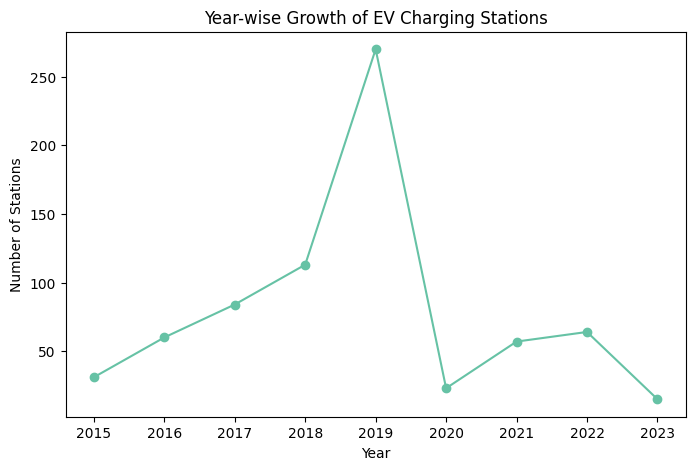

In [13]:
yearly_growth = df.groupby('Year')['Award Number'].count()

plt.figure(figsize=(8,5))
yearly_growth.plot(marker='o')
plt.title("Year-wise Growth of EV Charging Stations")
plt.xlabel("Year")
plt.ylabel("Number of Stations")
plt.show()


In [ ]:
# Clear upward trend, showing growing EV infrastructure adoption

# Reflects state-level policy push and incentives effectiveness

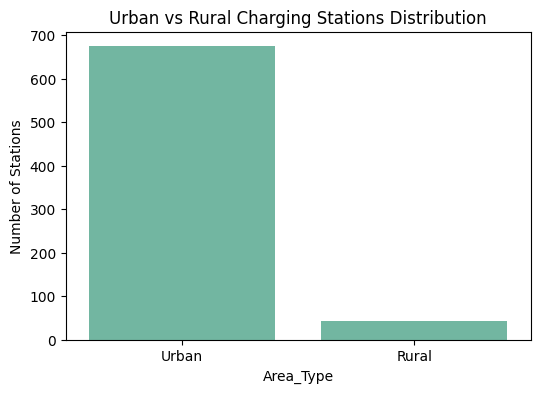

In [14]:
area_dist = df['Area_Type'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=area_dist.index, y=area_dist.values)
plt.title("Urban vs Rural Charging Stations Distribution")
plt.ylabel("Number of Stations")
plt.show()


In [ ]:
# Majority of charging stations are in urban areas

# Indicates infrastructure gap in rural regions → opportunity for expansion

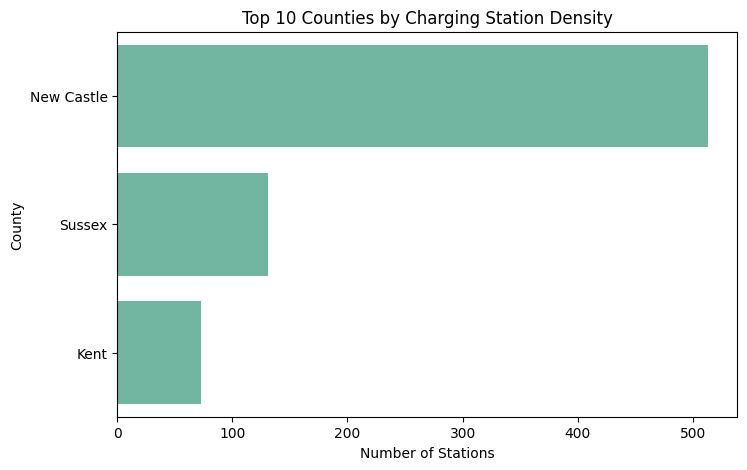

In [15]:
county_density = df['County'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=county_density.index, x=county_density.values)
plt.title("Top 10 Counties by Charging Station Density")
plt.xlabel("Number of Stations")
plt.show()


In [ ]:
# Few counties dominate EV infrastructure

# Suggests uneven distribution, helpful for policymakers & investors

In [16]:
unknown_city = df[df['City'] == 'Unknown'].groupby('County').size()

unknown_city.sort_values(ascending=False).head()


Series([], dtype: int64)

In [ ]:
# Certain counties have poor data quality or reporting gaps

# Important when building reliable dashboards & forecasts

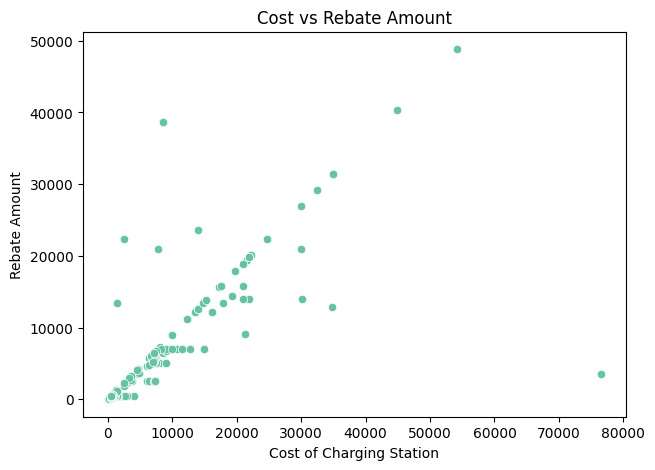

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Cost of Charging Station', y='Rebate Amount', data=df)
plt.title("Cost vs Rebate Amount")
plt.show()


In [ ]:
# Rebates generally increase with cost

# Suggests incentive structure is cost-proportional, encouraging higher-capacity installations

In [ ]:
#Key Insights Summary (Python EDA)

 # EV charging infrastructure in Delaware is growing year over year
 # Urban regions dominate charger installations → rural expansion opportunity
 # EV stations are concentrated in a few counties
 # Financial incentives are aligned with installation costs
 # Data quality gaps exist in certain regions → must be addressed before forecasting

In [18]:
df.to_csv("cleaned_ev_charging.csv", index=False)
